# Exercise notebook 3: Transforming and Combining Data

This Jupyter notebook is for Part 3 of The Open University's _Learn to code for Data Analysis_ course.

This notebook has all code examples and coding exercises. Remember to start by running the code in this notebook. You will need to add a code cell below each task to complete it.

You'll come across steps in the course directing you to this notebook. Once you've done each exercise, go back to the corresponding step and mark it as complete.

In [60]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

from pandas import *

## Exercise 1: Creating the data

Dataframes can be constructed from scratch as follows.

In [61]:
headings = ['Country', 'GDP (US$)']
table = [
  ['UK', 2678454886796.7],    # 1st row
  ['USA', 16768100000000.0],  # 2nd row
  ['China', 9240270452047.0], # and so on...
  ['Brazil', 2245673032353.8],
  ['South Africa', 366057913367.1]
]
gdp = DataFrame(columns=headings, data=table)
gdp

,Country,GDP (US$)
0,UK,2.678455e+12
1,USA,1.676810e+13
2,China,9.240270e+12
3,Brazil,2.245673e+12
4,South Africa,3.660579e+11


And similarly for the life expectancy of those born in 2013...

In [62]:
headings = ['Country name', 'Life expectancy (years)']
table = [
  ['China', 75],
  ['Russia', 71],  
  ['United States', 79],
  ['India', 66],
  ['United Kingdom', 81]
]
life = DataFrame(columns=headings, data=table)
life

,Country name,Life expectancy (years)
0,China,75
1,Russia,71
2,United States,79
3,India,66
4,United Kingdom,81


### Task

Create a dataframe with all five BRICS countries and their population, in thousands of inhabitants, in 2013. The values (given in the first exercise notebook) are: Brazil 200362, Russian Federation 142834, India 1252140, China 1393337, South Africa 52776.

In [63]:
popHeadings = ['Country name', 'Population (in 1000)']
popTable = [
  ['Brazil', 200362], 
  ['China', 1393337],
  ['Russia', 142834],
  ['India', 1252140],
  ['South Africa', 52776]
]
population = DataFrame(columns=popHeadings, data=popTable)
population

,Country name,Population (in 1000)
0,Brazil,200362
1,China,1393337
2,Russia,142834
3,India,1252140
4,South Africa,52776


**Now go back to the course step and mark it complete.**

## Exercise 2: Defining functions

The following function, written in two different ways, rounds a number to the nearest million. It calls the Python function `round()` which rounds a decimal number to the nearest integer. If two integers are equally near, it rounds to the even integer.

In [64]:
def roundToMillions (value):
    result = round(value / 1000000)
    return result

In [65]:
def roundToMillions (value):
    return round(value / 1000000)

To test a function, write expressions that check for various argument values whether the function returns the expected value in each case.

In [66]:
roundToMillions(4567890.1) == 5

True

In [67]:
roundToMillions(0) == 0  # always test with zero...

True

In [68]:
roundToMillions(-1) == 0 # ...and negative numbers

True

In [69]:
roundToMillions(1499999) == 1 # test rounding to the nearest

True

In [70]:
type(roundToMillions(23456789))

int

In [71]:
roundToMillions(popTable[1][1] * 1000)

1393

In [72]:
roundToMillions(population['Population (in 1000)'].iloc[1] * 1000)

1393.0

In [73]:
roundToMillions(population['Population (in 1000)'] * 1000)

0     200.0
1    1393.0
2     143.0
3    1252.0
4      53.0
Name: Population (in 1000), dtype: float64

The next function converts US dollars to British pounds.

In [74]:
def usdToGBP (usd):
    return usd / 1.564768 # average rate during 2013 

usdToGBP(0) == 0

True

In [75]:
usdToGBP(1.564768) == 1

True

In [76]:
usdToGBP(-1) < 0

True

In [77]:
usdToGBP(100)

63.90723736681732

### Tasks

1. Define a few more test cases for both functions.
- Why can't you use `roundToMillions()` to round the population to millions of inhabitants? Write a new function and test it. **You need to write this function in preparation for Exercise 4.**
- Write a function to convert US dollars to your local currency. If your local currency is USD or GBP, convert to Euros. Look up online what was the average exchange rate in 2013.

In [78]:
usdToGBP(0) == 0

True

In [79]:
usdToGBP(-1) == 0

False

In [80]:
usdToGBP(1) < 1

True

In [81]:
def usdToEuro(usd):
    '''Rate based on data found here:
    https://www.irs.gov/individuals/international-taxpayers/yearly-average-currency-exchange-rates
    Rate is 0.783 for 2013.'''
    return usd * 0.753

In [82]:
usdToEuro(100)

75.3

**Now go back to the course step and mark it complete.**

## Exercise 3: What if...?

The next function uses the full form of the conditional statement to expand the abbreviated country names UK and USA and leave other names unchanged.

In [83]:
def expandCountry (name):
    if name == 'UK':
        return 'United Kingdom'
    elif name == 'USA':
        return 'United States'
    else:
        return name

expandCountry('India') == 'India'

True

Here is the same function, written differently, using the simplest form of the conditional statement, without the `elif` and `else` parts.

In [84]:
def expandCountry (name):
    if name == 'UK':
        name = 'United Kingdom'
    if name == 'USA':
        name = 'United States'
    return name

**"Tasks", question 2:**
    This works on basically the same principal as the elif example.
    If the condition is not met, the program moves on to the next condition.
    If the next condition is not met, it falls to the next condition, which is to just return the name provided.

### Tasks

1. Write more tests.
- Explain why the second version of the function works. Note how the code is indented.
- Extend both versions to expand 'St. Lucia' to 'Saint Lucia'.
- Write a function to translate some country names from their original language to English, e.g. 'Brasil' to 'Brazil', 'España' to 'Spain' and 'Deutschland' to 'Germany'.
- Can you think of a different way of expanding abbreviated country names? You're not expected to write any code. Hint: this is a course about data tables.

In [120]:
def expandCountry(name):
    if name == 'UK':
        return 'United Kingdom'
    elif name == 'USA':
        return 'United States'
    elif name == 'St. Lucia':
        return 'Saint Lucia'
    else:
        return name
    
expandCountry('St. Lucia') == 'Saint Lucia'    

True

**Now go back to the course step and mark it complete.**

## Exercise 4: Applying functions

A one-argument function can be applied to each cell in a column, in order to obtain a new column with the converted values.

In [86]:
gdp['Country name'] = gdp['Country'].apply(expandCountry)
gdp

,Country,GDP (US$),Country name
0,UK,2.678455e+12,United Kingdom
1,USA,1.676810e+13,United States
2,China,9.240270e+12,China
3,Brazil,2.245673e+12,Brazil
4,South Africa,3.660579e+11,South Africa


Given that `apply()` is a column method that returns a column, it can be **chained**, to apply several conversions in one go.

In [87]:
gdp['GDP (£m)'] = gdp['GDP (US$)'].apply(usdToGBP).apply(roundToMillions)
gdp

,Country,GDP (US$),Country name,GDP (£m)
0,UK,2.678455e+12,United Kingdom,1711727
1,USA,1.676810e+13,United States,10716029
2,China,9.240270e+12,China,5905202
3,Brazil,2.245673e+12,Brazil,1435148
4,South Africa,3.660579e+11,South Africa,233937


Applying the conversion functions in a different order will lead to a different result.

In [88]:
gdp['GDP (US$)'].apply(roundToMillions).apply(usdToGBP).apply(round)

0     1711727
1    10716029
2     5905201
3     1435148
4      233938
Name: GDP (US$), dtype: int64

The original columns can be discarded.

In [89]:
headings = ['Country name', 'GDP (£m)']
gdp = gdp[headings]
gdp

,Country name,GDP (£m)
0,United Kingdom,1711727
1,United States,10716029
2,China,5905202
3,Brazil,1435148
4,South Africa,233937


### Task

Take the dataframe you created for Exercise 1, and apply to its population column the rounding function you wrote in Exercise 2.

In [90]:
population

,Country name,Population (in 1000)
0,Brazil,200362
1,China,1393337
2,Russia,142834
3,India,1252140
4,South Africa,52776


In [91]:
population['Population in millions'] = (population['Population (in 1000)']*1000).apply(roundToMillions)
headings = ['Country name', 'Population in millions']
millPop = population[headings]
millPop

,Country name,Population in millions
0,Brazil,200
1,China,1393
2,Russia,143
3,India,1252
4,South Africa,53


**Now go back to the course step and mark it complete.**

## Exercise 5: Joining left, right and centre

At this point, both tables have a common column, 'Country name', with fully expanded country names.

In [92]:
life

,Country name,Life expectancy (years)
0,China,75
1,Russia,71
2,United States,79
3,India,66
4,United Kingdom,81


In [93]:
gdp

,Country name,GDP (£m)
0,United Kingdom,1711727
1,United States,10716029
2,China,5905202
3,Brazil,1435148
4,South Africa,233937


A **left join** takes the rows of the left table and adds the columns of the right table. 

In [94]:
merge(gdp, life, on='Country name', how='left')

,Country name,GDP (£m),Life expectancy (years)
0,United Kingdom,1711727,81.0
1,United States,10716029,79.0
2,China,5905202,75.0
3,Brazil,1435148,NaN
4,South Africa,233937,NaN


A **right join** takes the rows from the right table, and adds the columns of the left table.

In [95]:
merge(gdp, life, on='Country name', how='right')

,Country name,GDP (£m),Life expectancy (years)
0,United Kingdom,1711727.0,81
1,United States,10716029.0,79
2,China,5905202.0,75
3,Russia,NaN,71
4,India,NaN,66


An **outer join** takes the union of the rows, i.e. it has all the rows of the left and right joins.

In [96]:
merge(gdp, life, on='Country name', how='outer')

,Country name,GDP (£m),Life expectancy (years)
0,United Kingdom,1711727.0,81.0
1,United States,10716029.0,79.0
2,China,5905202.0,75.0
3,Brazil,1435148.0,NaN
4,South Africa,233937.0,NaN
5,Russia,NaN,71.0
6,India,NaN,66.0


An **inner join** takes the intersection of the rows (i.e. the common rows) of the left and right joins.

In [97]:
gdpVsLife = merge(gdp, life, on='Country name', how='inner')
gdpVsLife

,Country name,GDP (£m),Life expectancy (years)
0,United Kingdom,1711727,81
1,United States,10716029,79
2,China,5905202,75


### Task

Join your population dataframe (from Exercise 4) with `gdpVsLife`, in four different ways, and note the differences.

In [98]:
popVs = merge(millPop, gdpVsLife, on='Country name', how='left')
popVs

,Country name,Population in millions,GDP (£m),Life expectancy (years)
0,Brazil,200,NaN,NaN
1,China,1393,5905202.0,75.0
2,Russia,143,NaN,NaN
3,India,1252,NaN,NaN
4,South Africa,53,NaN,NaN


In [115]:
popVs = merge(millPop, gdpVsLife, on='Country name', how='right')
popVs

,Country name,Population in millions,GDP (£m),Life expectancy (years)
0,China,1393.0,5905202,75
1,United Kingdom,NaN,1711727,81
2,United States,NaN,10716029,79


In [116]:
popVs = merge(millPop, gdpVsLife, on='Country name', how='outer')
popVs

,Country name,Population in millions,GDP (£m),Life expectancy (years)
0,Brazil,200.0,NaN,NaN
1,China,1393.0,5905202.0,75.0
2,Russia,143.0,NaN,NaN
3,India,1252.0,NaN,NaN
4,South Africa,53.0,NaN,NaN
5,United Kingdom,NaN,1711727.0,81.0
6,United States,NaN,10716029.0,79.0


In [117]:
popVs = merge(millPop, gdpVsLife, on='Country name', how='inner')
popVs

,Country name,Population in millions,GDP (£m),Life expectancy (years)
0,China,1393,5905202,75


**Now go back to the course step and mark it complete.**

## Exercise 6: Constant variables

Constants are used to represent fixed values (e.g. strings and numbers) that occur frequently in a program. Constant names are conventionally written in uppercase, with underscores to separate multiple words.

In [118]:
GDP_USD = 'GDP (US$)'
GDP_GBP = 'GDP (£m)'
GDP_USD

'GDP (US$)'

### Task

Look through the code you wrote so far, and rewrite it using constants, when appropriate.

In [119]:
# Ex 1
COUNTRY = 'Country Name'
POP_X_1K = 'Population (in 1000)'
popHeadings = [COUNTRY, POP_X_1K]
population = DataFrame(columns=popHeadings, data=popTable)
population

,Country Name,Population (in 1000)
0,Brazil,200362
1,China,1393337
2,Russia,142834
3,India,1252140
4,South Africa,52776


In [121]:
# Ex 4
POP_X_1M = 'Population in millions'
population[POP_X_1M] = (population[POP_X_1K]*1000).apply(roundToMillions)
headings = [COUNTRY, POP_X_1M]
millPop = population[headings]
millPop

,Country Name,Population in millions
0,Brazil,200
1,China,1393
2,Russia,143
3,India,1252
4,South Africa,53


In [123]:
# Ex 5
LIFE_EXPECT_YEARS = 'Life expectancy (years)'
lifeExpHeadings = [COUNTRY, LIFE_EXPECT_YEARS ]
life = DataFrame(columns=lifeExpHeadings, data=table)
life

,Country Name,Life expectancy (years)
0,China,75
1,Russia,71
2,United States,79
3,India,66
4,United Kingdom,81


In [125]:
# EX 5
GDP_USD = 'GDP (US$)'
gdp_headings = ['Country', GDP_USD]
gdp_table = [
  ['UK', 2678454886796.7],    # 1st row
  ['USA', 16768100000000.0],  # 2nd row
  ['China', 9240270452047.0], # and so on...
  ['Brazil', 2245673032353.8],
  ['South Africa', 366057913367.1]
]
gdp = DataFrame(columns=gdp_headings, data=gdp_table)
gdp

,Country,GDP (US$)
0,UK,2.678455e+12
1,USA,1.676810e+13
2,China,9.240270e+12
3,Brazil,2.245673e+12
4,South Africa,3.660579e+11


In [127]:
GDP_GBP_X_1M = 'GDP (£m)'
gdp[COUNTRY] = gdp['Country'].apply(expandCountry)
gdp[GDP_GBP_X_1M] = gdp[GDP_USD].apply(usdToGBP).apply(roundToMillions)
gdp_headings = [COUNTRY, GDP_GBP_X_1M]
gdp = gdp[gdp_headings]
gdp

,Country Name,GDP (£m)
0,United Kingdom,1711727
1,United States,10716029
2,China,5905202
3,Brazil,1435148
4,South Africa,233937


In [128]:
# Ex 6
gdpVsLife = merge(gdp, life, on=COUNTRY, how='inner')
gdpVsLife

,Country Name,GDP (£m),Life expectancy (years)
0,United Kingdom,1711727,81
1,United States,10716029,79
2,China,5905202,75


**Now go back to the course step and mark it complete.**

## Exercise 7: Getting real

It is possible to directly download data from the World Bank, for a particular time period and indicator, like the GDP in current US dollars. The indicator name is given in the URL of the webpage about the dataset.

Getting the data directly from the World Bank only works with Anaconda (or a paid CoCalc account) and requires an Internet connection. It can take some time to download the data, depending on the speed of your connection and the load on the World Bank server. Moreover, the World Bank occasionally changes the layout of the data, which could break the code in the rest of this notebook. 

To avoid such problems I have saved the World Bank data into CSV files. The data is in a column with the same name as the indicator. Hence I declare the indicator names as constants, to be used later when processing the dataframe.

In [100]:
GDP_INDICATOR = 'NY.GDP.MKTP.CD'
gdpReset = read_csv('WB GDP 2013.csv')

LIFE_INDICATOR = 'SP.DYN.LE00.IN'
lifeReset = read_csv('WB LE 2013.csv')

The CSV files were obtained in two steps, which are shown next in commented code because we already have the CSV files. 

First the data was obtained directly from the World Bank using a particular function in pandas, and indicating the desired indicator and time period. Note that you may have to install the `pandas_datareader` module, using Anaconda Navigator.

In [130]:
#from pandas_datareader.wb import download

#YEAR = 2013
#gdpWB = download(indicator=GDP_INDICATOR, country='all', start=YEAR, end=YEAR)
#lifeWB = download(indicator=LIFE_INDICATOR, country='all', start=YEAR, end=YEAR)
#lifeWB.head()

,,SP.DYN.LE00.IN
country,year,
Arab World,2013,70.598298
Caribbean small states,2013,72.779180
Central Europe and the Baltics,2013,76.355163
Early-demographic dividend,2013,68.957658
East Asia & Pacific,2013,74.919071


The downloaded dataframe has descriptive row names instead of the usual 0, 1, 2, etc. In other words, the dataframe's index is given by the country and year instead of integers. Hence the second step was to reset the index. 

In [131]:
#gdpReset = gdpWB.reset_index()
#lifeReset = lifeWB.reset_index()

Resetting the index put the dataframes into the usual form, which was saved to CSV files. 

In [103]:
lifeReset.head()

,country,year,SP.DYN.LE00.IN
0,Arab World,2013,70.631305
1,Caribbean small states,2013,71.901964
2,Central Europe and the Baltics,2013,76.127583
3,East Asia & Pacific (all income levels),2013,74.604619
4,East Asia & Pacific (developing only),2013,73.657617


### Tasks

1. Create a data frame with the World Bank's data on population, using the CSV file provided. **This dataframe will be used in the remaining exercises.**
- If you're using Anaconda, uncomment the code above and run it to check that you can get the GDP and life expectancy data directly from the World Bank. **Don't forget to afterwards comment again the code.**
- If you have extra time, you can alternatively obtain the population data directly from the World Bank: go to their [data page](http://data.worldbank.org/), search for population, select the total population indicator, note its name in the URL, copy the commented code above and adapt it to get the data and reset its index. Note that the World Bank may have changed its data format since this was written and therefore you may have to do extra steps to get a dataframe in the same shape as the CSV file we provide, with three columns for country name, year and population.

**Now go back to the course step and mark it complete.**

## Exercise 8: Cleaning up

The expression `frame[m:n]` represents a dataframe with only row `m` to row `n-1` (or until the end if `n` is omitted) of `frame`.

In [104]:
lifeReset[0:3]

,country,year,SP.DYN.LE00.IN
0,Arab World,2013,70.631305
1,Caribbean small states,2013,71.901964
2,Central Europe and the Baltics,2013,76.127583


In [105]:
lifeReset[240:]

,country,year,SP.DYN.LE00.IN
240,Vanuatu,2013,71.669244
241,"Venezuela, RB",2013,74.074415
242,Vietnam,2013,75.756488
243,Virgin Islands (U.S.),2013,79.624390
244,West Bank and Gaza,2013,73.203341
245,"Yemen, Rep.",2013,63.583512
246,Zambia,2013,59.237366
247,Zimbabwe,2013,55.633000


The first rows of World Bank dataframes are aggregated data for country groups, and are thus discarded. There were 34 country groups when I generated the CSV files, but the World Bank sometimes adds or removes groups. Therefore, if you obtained the data directly from the World Bank, you may need to discard more or fewer than 34 rows to get a dataframe that starts with Afghanistan.

In [106]:
gdpCountries = gdpReset[34:]
lifeCountries = lifeReset[34:]
gdpCountries.head()

,country,year,NY.GDP.MKTP.CD
34,Afghanistan,2013,2.045894e+10
35,Albania,2013,1.278103e+10
36,Algeria,2013,2.097035e+11
37,American Samoa,2013,NaN
38,Andorra,2013,3.249101e+09


Rows with missing data are dropped.

In [107]:
gdpData = gdpCountries.dropna()
lifeData = lifeCountries.dropna()
gdpData.head()

,country,year,NY.GDP.MKTP.CD
34,Afghanistan,2013,2.045894e+10
35,Albania,2013,1.278103e+10
36,Algeria,2013,2.097035e+11
38,Andorra,2013,3.249101e+09
39,Angola,2013,1.383568e+11


The year column is discarded.

In [108]:
COUNTRY = 'country'
headings = [COUNTRY, GDP_INDICATOR]
gdpClean = gdpData[headings]
headings = [COUNTRY, LIFE_INDICATOR]
lifeClean = lifeData[headings]
lifeClean.head()

,country,SP.DYN.LE00.IN
34,Afghanistan,60.028268
35,Albania,77.537244
36,Algeria,74.568951
39,Angola,51.866171
40,Antigua and Barbuda,75.778659


### Task

Clean the population dataframe you created in Exercise 7.

If in Exercise 7 you chose to directly get the population data from the World Bank instead of using the provided CSV file, you may need to remove more (or fewer) than 34 rows at the start of the dataframe due to changes done by the World Bank to its data reporting.

In [147]:
headers = ['country','SP.DYN.LE00.IN']
lifeCleaned = lifeReset[47:].dropna()[headers]
lifeCleaned

,country,SP.DYN.LE00.IN
47,Afghanistan,62.494000
48,Albania,77.702000
49,Algeria,75.418000
52,Angola,60.373000
53,Antigua and Barbuda,75.892000
54,Argentina,76.089000
55,Armenia,74.044000
56,Aruba,75.440000
57,Australia,82.148780
58,Austria,81.136585


**Now go back to the course step and mark it complete.**

## Exercise 9: Joining and transforming

The two dataframes can now be merged with an inner join.

In [145]:
gdpVsLifeAll = merge(gdpClean, millPop, on=COUNTRY, how='inner')
gdpVsLifeAll.head()

KeyError: 'Country Name'

The dollars are converted to million pounds.

In [110]:
GDP = 'GDP (£m)'
column = gdpVsLifeAll[GDP_INDICATOR]
gdpVsLifeAll[GDP] = column.apply(usdToGBP).apply(roundToMillions)
gdpVsLifeAll.head()

,country,NY.GDP.MKTP.CD,SP.DYN.LE00.IN,GDP (£m)
0,Afghanistan,2.045894e+10,60.028268,13075
1,Albania,1.278103e+10,77.537244,8168
2,Algeria,2.097035e+11,74.568951,134016
3,Angola,1.383568e+11,51.866171,88420
4,Antigua and Barbuda,1.200588e+09,75.778659,767


The life expectancy is rounded, by applying the `round()` function.

In [111]:
LIFE = 'Life expectancy (years)'
gdpVsLifeAll[LIFE] = gdpVsLifeAll[LIFE_INDICATOR].apply(round)
gdpVsLifeAll.head()

,country,NY.GDP.MKTP.CD,SP.DYN.LE00.IN,GDP (£m),Life expectancy (years)
0,Afghanistan,2.045894e+10,60.028268,13075,60
1,Albania,1.278103e+10,77.537244,8168,78
2,Algeria,2.097035e+11,74.568951,134016,75
3,Angola,1.383568e+11,51.866171,88420,52
4,Antigua and Barbuda,1.200588e+09,75.778659,767,76


The original GDP and life expectancy columns are dropped.

In [112]:
headings = [COUNTRY, GDP, LIFE]
gdpVsLifeClean = gdpVsLifeAll[headings]
gdpVsLifeClean.head()

,country,GDP (£m),Life expectancy (years)
0,Afghanistan,13075,60
1,Albania,8168,78
2,Algeria,134016,75
3,Angola,88420,52
4,Antigua and Barbuda,767,76


### Tasks

1. Merge `gdpVsLifeClean` with the population dataframe obtained in the previous exercise. 
- Round the population value to the nearest million.
- Remove the original population column.

In [144]:
ex9 = merge(gdpVsLifeClean, lifeCleaned, on='country', how='inner')
ex9

,country,GDP (£m),Life expectancy (years),SP.DYN.LE00.IN
0,Afghanistan,13075,60,62.494000
1,Albania,8168,78,77.702000
2,Algeria,134016,75,75.418000
3,Angola,88420,52,60.373000
4,Antigua and Barbuda,767,76,75.892000
5,Argentina,392636,76,76.089000
6,Armenia,7107,75,74.044000
7,Australia,999478,82,82.148780
8,Austria,273969,81,81.136585
9,Azerbaijan,47010,71,71.656000


**Now go back to the course step and mark it complete.**

## Exercise 10: Correlation

The Spearman rank correlation coefficient between GDP and life expectancy, and the corresponding p-value are calculated as follows.

In [113]:
from scipy.stats import spearmanr

gdpColumn = gdpVsLifeClean[GDP]
lifeColumn = gdpVsLifeClean[LIFE]
(correlation, pValue) = spearmanr(gdpColumn, lifeColumn)
print('The correlation is', correlation)
if pValue < 0.05:
    print('It is statistically significant.')
else:
    print('It is not statistically significant.')

The correlation is 0.501023238967
It is statistically significant.


### Task

Calculate the correlation between GDP and population.

**Now go back to the course step and mark it complete.**

## Exercise 11: Scatterplots

The dataframe method `plot()` can also produce scatterplots. The `logx` and `logy` arguments  set a logarithmic scale on the corresponding axis.

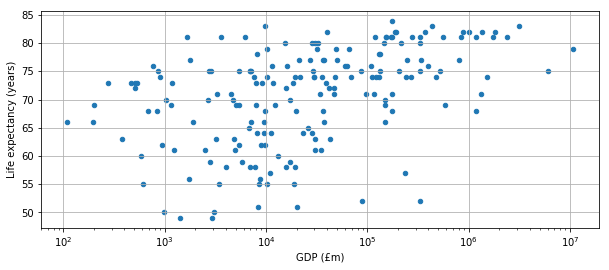

In [114]:
%matplotlib inline
gdpVsLifeClean.plot(x=GDP, y=LIFE, kind='scatter', grid=True, logx=True, figsize = (10, 4))

### Tasks

- Swap the axes of the scatterplot, i.e. show the GDP in the y axis and the life expectancy in the x axis.
- Display a scatterplot of the GDP and the population.

**Now go back to the course step and mark it complete.**